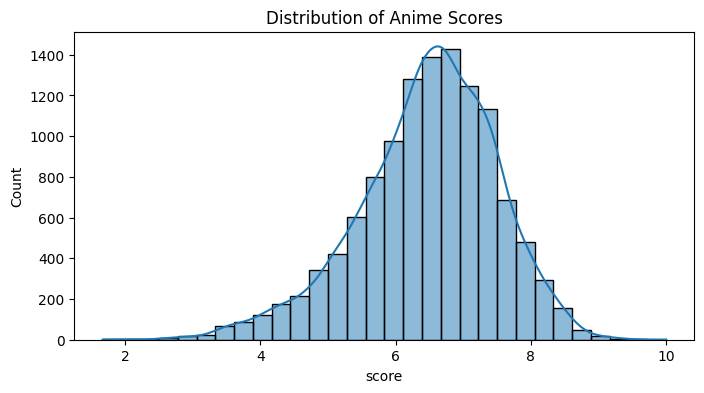

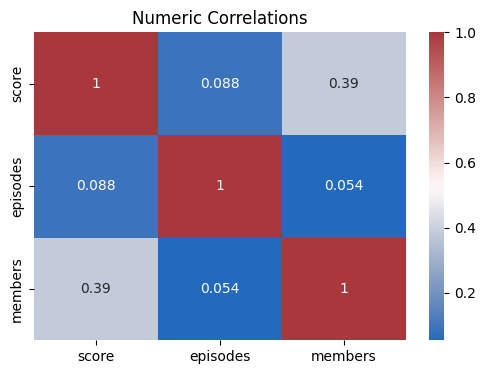

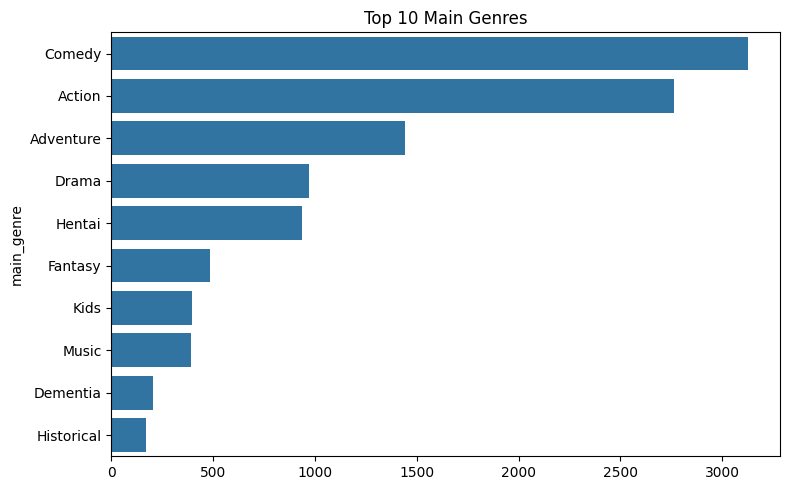

In [1]:
# 2_eda.ipynb cell — quick EDA plots + correlation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

ROOT = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
PROC = ROOT / "data" / "processed"
OUT = ROOT / "outputs" / "figures"
OUT.mkdir(parents=True, exist_ok=True)

df = pd.read_csv(PROC / "anime_model_ready.csv")

# Distribution of scores
plt.figure(figsize=(8,4))
sns.histplot(df["score"], bins=30, kde=True)
plt.title("Distribution of Anime Scores")
plt.savefig(OUT / "score_distribution.png", dpi=200)
plt.show()

# Correlation matrix for numeric columns
num_cols = ["score","episodes","members"]
corr = df[num_cols].corr()
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="vlag")
plt.title("Numeric Correlations")
plt.savefig(OUT / "numeric_correlations.png", dpi=200)
plt.show()

# Top 10 genres by count
top_genres = df["main_genre"].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top 10 Main Genres")
plt.tight_layout()
plt.savefig(OUT / "top_genres.png", dpi=200)
plt.show()
